# HateBot

## 1. Introduction

Hate speech is something that is a big issue nowadays especially with social media like Twitter. Negativity that comes out of it can take a toll on a person’s mental health. To minimize the damage of that, the HateBot can return if a tweet is hate speech or not by being given a Tweet. This way we can ensure that the world becomes if not a better place then at least a place where we can influence the amount of negativity we get.

**WARNING: Some of the graphics contain sensitive content (hate speech) because of the nature of this project.**

# 2. Setup

In this part of the notebook, I am going to do the importing of libraries/modules and the dataset and setup the global settings needed for the figures.

### 2.1 Imports

In [314]:
import pandas as pd

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

import scattertext as st
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)
print('scattertext version:', st.__version__)

%matplotlib inline

pandas version: 1.1.3
matplotlib version: 3.3.2
scattertext version: 0.1.2


### 2.2 Global settings
#### Figure parameters
This are being set up to change the image sizes of the word cloud figures

In [315]:
plt.rcParams['figure.figsize'] = [7.6, 6]
plt.rcParams['figure.dpi'] = 120

### 2.3 Importing the dataset that will be used

The dataset is stored in a CSV format (comma-separated values file) in the file HateBotDataset.

In [316]:
df = pd.read_csv("HateBotDataset.csv")

Note: The used dataset is taken from Thomas Davidson, Dana Warmsley, Michael Macy, and Ingmar Weber. 2017. "Automated Hate Speech Detection and the Problem of Offensive Language."

For the dataset they used a crowd-sourced hate speech lexicon to collect tweets containing hate speech keywords and crowd-sourcing to label a sample of these tweets into three categories: those containing hate speech, only offensive language, and those with neither. For me, it doesn't matter if the data is specifically offensive or hate speech - in the later phase of the project all tpyes of hate speech will be taken into account no matter if it's offensive or hate speech.

*Extra explanation: <br>
Hate speech is communication that is deemed to be harmful (individually or at a social level) on the basis of defined ‘protected attributes’. Those attributes are for example race, disability, sexuality etc. <br>
Offensive speech is simply any communication that upsets someone.*

## 3. Data exploration

In this step I will be exploring the data, finding out what the columns are, how much and what type of data we have. 

### 3.1 Basic data information

By running the head command with an argument of n=10, I get the first 10 rows out of the CSV file

In [317]:
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


### 3.2 Columns
The data file contains 5 columns with relevant data:

In [318]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

|Column name|Description|
|---|---|
|count|number of CrowdFlower users who coded each tweet |
|hate_speech|number of CF users who judged the tweet to be hate speech|
|offensive_language| number of CF users who judged the tweet to be offensive|
|neither|number of CF users who judged the tweet to be neither offensive nor non-offensive|
|class|class label for majority of CF users. For meaning check the next table|


|Class numbers|Meaning|
|---|---|
|0|hate speech|
|1|offensive language|
|2|neither|


Remarks: The minimum number of CrowdFlower users who coded each tweet is 3. Sometimes more users coded a tweet when judgments were determined to be unreliable by CF.

### 3.3 Shape

In [319]:
df.shape

(24783, 7)

The shape represents the dimensionality of the DataFrame. We can see that in ours there are 7 columns and 24783 entries into the CSV file.

### 3.4 Data types

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


From calling the info method, we can see that all the columns are non-null and everything except the tweet itself is in numeric format (int64). This means that we do not have missing data in our dataset. This is also confirmed when manually browsing the dataset.

### 3.5 Exploring the numeric data
To explore more the numeric part of the dataset, we are using the describe method. This way we can get extra information like the mean, minimum and maximum values of the numeric data.

In [321]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


For example, we see that the minimum number of people that labeled a certain tweet is 3 while the maximum for that is 9.

### 3.6 Uniqueness in the data

In [322]:
df.nunique()

Unnamed: 0            24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64

There are 5 different values for class (and as we already know they are hate speech/offensive language/none). <br>
We can also notice that all the tweets have unique content.

#### 3.6.1 Number of rows containing duplicate data

In [323]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


There are no duplicated rows.

#### 3.6.2 Missing data

In [324]:
df.count() 

Unnamed: 0            24783
count                 24783
hate_speech           24783
offensive_language    24783
neither               24783
class                 24783
tweet                 24783
dtype: int64

By using the count method, we can see that there is no missing data.

#### 3.6.3 Null data

In [325]:
print(df.isnull().sum())

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


And no cells that are null in any of the columns

### 3.7 Classification classes labels
#### 3.7.1 Histogram of the different labels

<AxesSubplot:>

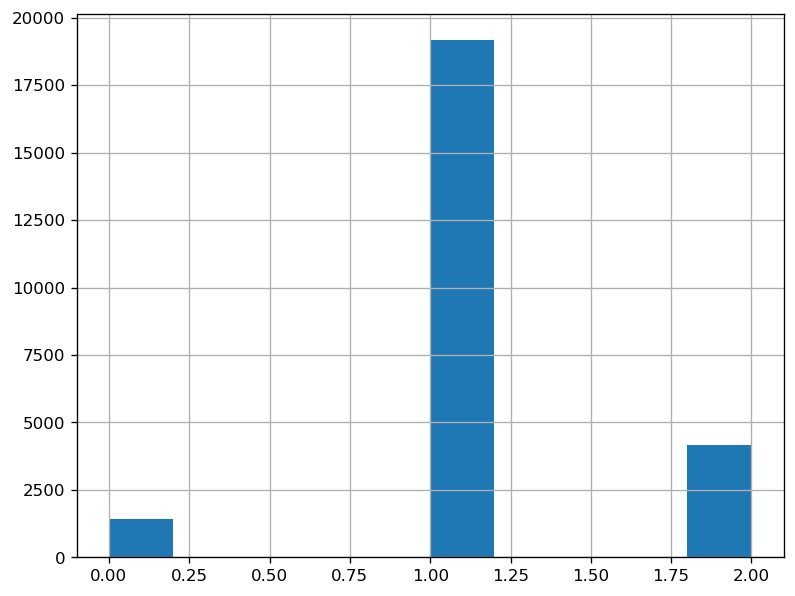

In [326]:
df['class'].hist()

With this histogram, we can see that our class labels are spread with the three values only - 0, 1 and 2. The most is 1 which is offensive language, followed by 2 (none) and the last is hate speech only. This might become a problem later on because we have a lot more hate tweets than normal ones so we have to be cautious if our machine learning does not go as planned.

#### 3.7.2 Counts of the tweets per class

In [327]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

We can see that in our data set we have:<br>
- 1430 tweets that were marked mostly as hate speech, <br>
- 19190 - as offensive language<br>
- 4163 - not hate speech<br>

In [328]:
(df['class'] != 2).value_counts()

True     20620
False     4163
Name: class, dtype: int64

In total, 20620 of the tweets are hate speech and 4163 are not.

## 4. Cleaning the data

#### 4.1 Add a new column 'marked'

I will add a new column marked that combines the number of people that marked a tweet as hate speech with the number of people that marked it as offensive.

In [329]:
df['marked'] = df['hate_speech'] + df['offensive_language']

#### 4.2 Drop the columns for distinction between hate speech and offensive language
I will drop the column for the number of people that voted for the tweets as offensive/hateful - offensive_language and hate_speech. As already mentioned, for us it does **NOT** matter whether the Tweet is offensive and/or using hate speech. We only want to know if its hateful and this is achieved with the help of the column added at `4.1`.

In [330]:
df = df.drop(columns=['offensive_language', 'hate_speech'])

#### 4.3 Drop the id columns

The id column that comes with the dataset will also be dropped because it will not be used in the next steps of the project and thus is not significant for us.

In [331]:
df = df.drop(df.columns[0], axis=1)

#### 4.4 Add a column that says if it is any kind of hateful speech

I will also add a new column that tells us if a tweet is considered hate. This is to help us out only (because we already have that information from the `class` column).

In [332]:
df['is_hate_speech'] = df['class'] != 2

#### 4.5 Clean the non numeric and alphabetic characters

I will clean up the tweets using a RegEx. A regular expression(RegEx) is a sequence of characters that specifies a search pattern. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation. In our case, it is going to be used to remove non numeric and alphabetic characters from the tweets. I will also remove all the user tags (so all the words that start with @ because that is the way to tag another user on Twitter)

In [333]:
df.tweet = df.tweet.str.replace('(@\w+.*?)',"").replace('[^a-zA-Z0-9 ]', '', regex=True)

#### 4.6 End result

The end result of the cleaned dataset looks like this:

In [334]:
df

,count,neither,class,tweet,marked,is_hate_speech
0,3,3,2,RT As a woman you shouldnt complain about cl...,0,False
1,3,0,1,RT boy dats coldtyga dwn bad for cuffin dat ...,3,True
2,3,0,1,RT Dawg RT You ever fuck a bitch and she st...,3,True
3,3,1,1,RT she look like a tranny,2,True
4,6,0,1,RT The shit you hear about me might be true ...,6,True
...,...,...,...,...,...,...
24778,3,1,1,yous a muthafin lie 8220 right His TL is tra...,2,True
24779,3,2,2,youve gone and broke the wrong heart baby and ...,1,False
24780,3,0,1,young buck wanna eat dat nigguh like I aint fu...,3,True
24781,6,0,1,youu got wild bitches tellin you lies,6,True


###  5. Count occurances of different words in the dataset

For this I will be using a Counter object. A Counter is basically a container that keeps track of how many times equivalent values are added.

#### 5.1 Most used words

In [335]:
counter = Counter(" ".join(cleaned_tweets).split(" ")).items()
most_used_words = dict(sorted(counter, key=lambda item: item[1], reverse=True))

Words that are present in more than 50 tweets:

In [336]:
print({key : val for key, val in most_used_words.items() if not (isinstance(val, int) and (val < 50))})

{'': 20276, 'a': 9111, 'bitch': 7950, 'RT': 7557, 'the': 6610, 'I': 6595, 'to': 5267, 'you': 5212, 'and': 3679, 'that': 3209, 'my': 3085, 'in': 2941, 'bitches': 2924, 'is': 2809, 'like': 2606, 'me': 2573, 'of': 2505, 'on': 2423, 'be': 2325, 'hoes': 2257, 'for': 2044, 'pussy': 2038, 'hoe': 1837, 'with': 1804, 'it': 1748, 'Im': 1679, 'this': 1639, '8220': 1591, 'ass': 1533, 'dont': 1525, 'up': 1471, 'your': 1429, 'get': 1339, 'just': 1261, 'but': 1250, 'all': 1247, 'got': 1211, 'shit': 1188, 'they': 1181, 'u': 1158, 'so': 1153, 'fuck': 1139, 'was': 1126, 'trash': 1113, 'are': 1102, 'nigga': 1095, 'aint': 1082, 'her': 1081, 'at': 1062, 'out': 1037, 'no': 1037, 'not': 1028, 'these': 1025, 'have': 1000, 'when': 966, 'she': 931, 'about': 903, 'if': 878, 'i': 871, 'amp': 834, 'some': 779, 'You': 778, 'know': 776, 'lol': 763, 'do': 747, 'he': 747, 'can': 716, 'them': 649, 'niggas': 648, 'its': 645, 'love': 642, 'what': 638, 'one': 622, 'or': 614, 'If': 611, 'as': 608, 'who': 574, 'cant': 571, 

#### 5.1.1 Wordcloud of most used words in all tweets

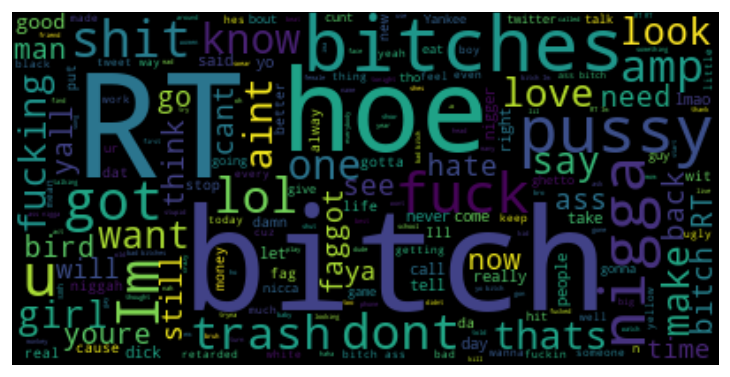

In [337]:
# Combine all the tweets into one
text = text = " ".join(review for review in df.tweet)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 5.1.2 Most common words that are present in both hate speech and non-hate speech tweets

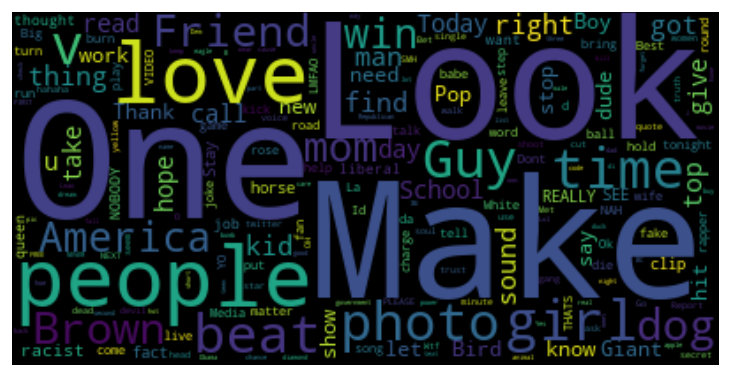

In [338]:
general_tweets = df.loc[df['is_hate_speech'] == False].tweet
general_tweets = general_tweets.replace('[^a-zA-Z0-9 ]', '', regex=True)
counted = Counter(" ".join(general_tweets).split(" ")).items()
general_tweets_dict = dict(sorted(counted, key=lambda item: item[1], reverse=True))

shared_words = set(most_used_hate_tweets_dict).intersection(general_tweets_dict)
text = text = " ".join(word for word in shared_words)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 5.2 Most used words in hate Tweets
I am also going to do the same but for only tweets that were marked as hate speech:

In [339]:
hate_tweets = df.loc[df['is_hate_speech'] == True].tweet
counted = Counter(" ".join(hate_tweets).split(" ")).items()
most_used_hate_tweets_dict = dict(sorted(counted, key=lambda item: item[1], reverse=True))
print({key : val for key, val in most_used_hate_tweets_dict.items() if not (isinstance(val, int) and (val < 50))})

{'': 16576, 'bitch': 7940, 'a': 7841, 'RT': 6247, 'I': 5654, 'the': 4906, 'you': 4739, 'to': 4265, 'bitches': 2924, 'and': 2864, 'that': 2829, 'my': 2738, 'like': 2318, 'me': 2294, 'hoes': 2246, 'in': 2241, 'is': 2168, 'pussy': 2031, 'on': 2027, 'be': 2020, 'of': 1836, 'hoe': 1809, 'for': 1564, 'ass': 1531, 'with': 1517, 'Im': 1496, '8220': 1449, 'it': 1427, 'this': 1411, 'dont': 1377, 'up': 1316, 'your': 1241, 'get': 1209, 'shit': 1183, 'fuck': 1139, 'got': 1120, 'nigga': 1095, 'all': 1079, 'but': 1074, 'u': 1061, 'just': 1057, 'aint': 1048, 'her': 1030, 'they': 1029, 'so': 985, 'these': 981, 'no': 936, 'was': 909, 'she': 892, 'at': 875, 'out': 870, 'when': 863, 'not': 844, 'are': 819, 'have': 810, 'about': 783, 'i': 764, 'if': 756, 'You': 695, 'know': 690, 'some': 672, 'amp': 671, 'lol': 666, 'do': 652, 'niggas': 648, 'he': 600, 'can': 580, 'them': 580, 'fucking': 569, 'love': 567, 'what': 546, 'If': 537, 'one': 518, 'yo': 518, 'cant': 511, 'or': 507, 'its': 500, 'go': 489, 'want': 4

#### 5.2.1 Wordcloud of most used words in hate tweets

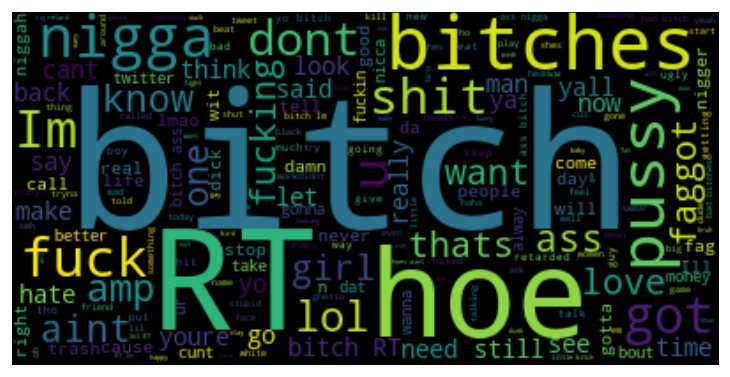

In [340]:
# Combine all the tweets into one
text = text = " ".join(review for review in hate_tweets)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It is quite clear from the marked as hate tweets that words like bitch, bitches,, hoe, nigga, fuck, etc are making the users mark those tweets as hate speech. All of those words appear in a study about Identifying and Categorising Profane Words in Hate Speech by Phoey Lee Teh, Chi-Bin Chen, Weng Mun Chee (https://www.researchgate.net/publication/325434675_Identifying_and_Categorising_Profane_Words_in_Hate_Speech)

#### 5.3 Wordcloud of most used words in normal (not hate) tweets

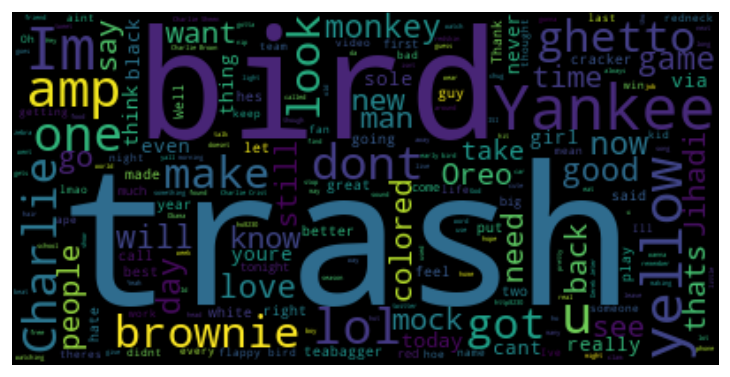

In [341]:
positive_tweets = df.loc[df['is_hate_speech'] == False].tweet

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["RT"])

# Combine all the tweets into one
text = text = " ".join(review for review in positive_tweets)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A weird trend we see is that the name Charlie was present in a lot of the Tweets that were not considered hate speech. When expecting the tweets that contain that text:

In [342]:
charlie_tweets = df[df.tweet.str.contains("Charlie")]
charlie_tweets.tweet.count

<bound method Series.count of 173       Charlie Sheen is too real httptcogGGdK3kOV7 m...
228        Holy shit Freddie Highmore was in Charlie an...
372       HGWells and Charlie Chaplin httptcosTiDDHK3WT...
611      You hit no lights no line for toco bell at 2 i...
660      2013Faves RT 8220 Snoop and Justin are having ...
                               ...                        
22655    When Charlie tries to walk into my room and it...
22997    Wow Charlie Strong is cleaning house Might be ...
23486    Your A Good Gravedigger Charlie Brown SpookyBr...
24505    the Hitman Holla vs Charlie Clips matchup is b...
24558    theyre not playing Charlie Strongs soft dont r...
Name: tweet, Length: 285, dtype: object>

it becomes quite clear to us that this is just a widely used name in our dataset and not an important feature. However, it is quite interesting to note that the name *Charlie Sheen* was a very tweeted about person (33 times):

In [343]:
df[df.tweet.str.contains("Charlie Sheen")].shape

(33, 6)

Charlie Sheen is actually a popular actor who BBC called Hollywood's troubled star (https://www.bbc.com/news/entertainment-arts-12673937). He made a lot of things in his career that were widely discussed on the Internet.

Another widely discussed name we see here is *Charlie Brown* who was mentioned in 26 different tweets:

In [344]:
df[df.tweet.str.contains("Charlie Brown")].shape

(26, 6)

After some investigation, it turns out that Charlie Brown is not a person but a very popular TV character (https://en.wikipedia.org/wiki/Charlie_Brown). There is even a thread on reddit about why he is disliked (https://www.reddit.com/r/peanuts/comments/8v9k12/what_did_charlie_brown_do_or_say_to_make_everyone/)

We can also see another famous name on the list - *Charlie Chaplin*

In [345]:
df[df.tweet.str.contains("Charlie Chaplin")].shape

(6, 6)

After that investigation, we can easily say that the name Charlie is used because there are quite some internet popular personas that carry that name. 

#### 5.4 Words that are present in hate speech but not in general tweets

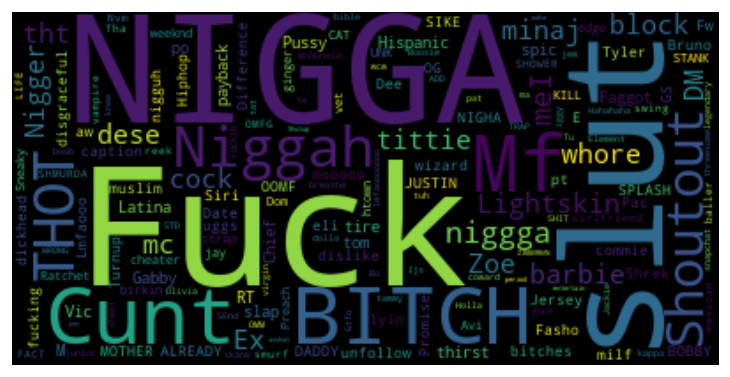

In [346]:
only_hate_words = set(most_used_hate_tweets_dict) - set(general_tweets_dict)
text = text = " ".join(word for word in only_hate_words)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 6. Conclusions
The dataset has enough data for hatespeech and normal tweets. The data is cleaned and can be used in a machine learning algorithm. It has enough hate speech in it for a machine to be able to classify a tweet as hate speech or not. For the Machine Learning part, the cleaned dataset can be found in the file `CleanedHateBotDataset.csv`.

In [347]:
df.to_csv(r'CleanedHateBotDataset.csv', index = False)

### References

The paper ("Automated Hate Speech Detection and the Problem of Offensive Language") from which the dataset is taken, published by Cornell University - https://arxiv.org/abs/1703.04009


The conference paper ("Identifying and Categorising Profane Words in Hate Speech" by Phoey Lee Teh, Chi-Bin Chen, Weng Mun Chee)- https://www.researchgate.net/publication/325434675_Identifying_and_Categorising_Profane_Words_in_Hate_Speech

###  Credits
The following Jupyter notebook was made by Karina Kozarova as part of the Artificial Intelligence specialization at Fontys University of Applied Sciences